<a href="https://colab.research.google.com/github/jorgelum/meuPortfolio/blob/master/SerieHistoricaGasolina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install calplot

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import calplot

Fonte: <https://www.gov.br/anp/pt-br/assuntos/precos-e-defesa-da-concorrencia/precos/precos-revenda-e-de-distribuicao-combustiveis/shlp/mensal/>.

In [3]:
df = pd.read_excel('https://www.gov.br/anp/pt-br/assuntos/precos-e-defesa-da-concorrencia/precos/precos-revenda-e-de-distribuicao-combustiveis/shlp/mensal/mensal-estados-desde-jan2013.xlsx',
                   skiprows = 16,usecols = 'A:J' )
df.head()

,MÊS,PRODUTO,REGIÃO,ESTADO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA
0,2013-01-01,OLEO DIESEL,NORTE,ACRE,258,R$/l,2.663,0.137,2.38,2.950
1,2013-01-01,OLEO DIESEL,NORDESTE,ALAGOAS,372,R$/l,2.118,0.044,2.02,2.229
2,2013-01-01,OLEO DIESEL,NORTE,AMAPA,149,R$/l,2.231,0.108,2.16,2.550
3,2013-01-01,OLEO DIESEL,NORTE,AMAZONAS,508,R$/l,2.222,0.120,2.02,2.620
4,2013-01-01,OLEO DIESEL,NORDESTE,BAHIA,1851,R$/l,2.086,0.087,1.89,2.399


In [4]:
df.shape

(17263, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16903 entries, 0 to 16902
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   MÊS                           16903 non-null  datetime64[ns]
 1   PRODUTO                       16903 non-null  object        
 2   REGIÃO                        16903 non-null  object        
 3   ESTADO                        16903 non-null  object        
 4   NÚMERO DE POSTOS PESQUISADOS  16903 non-null  int64         
 5   UNIDADE DE MEDIDA             16903 non-null  object        
 6   PREÇO MÉDIO REVENDA           16903 non-null  float64       
 7   DESVIO PADRÃO REVENDA         16903 non-null  float64       
 8   PREÇO MÍNIMO REVENDA          16903 non-null  float64       
 9   PREÇO MÁXIMO REVENDA          16903 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 1.3+ MB


In [ ]:
df.ESTADO.unique()

array(['ACRE', 'ALAGOAS', 'AMAPA', 'AMAZONAS', 'BAHIA', 'CEARA',
       'DISTRITO FEDERAL', 'ESPIRITO SANTO', 'GOIAS', 'MARANHAO',
       'MATO GROSSO', 'MATO GROSSO DO SUL', 'MINAS GERAIS', 'PARA',
       'PARAIBA', 'PARANA', 'PERNAMBUCO', 'PIAUI', 'RIO DE JANEIRO',
       'RIO GRANDE DO NORTE', 'RIO GRANDE DO SUL', 'RONDONIA', 'RORAIMA',
       'SANTA CATARINA', 'SAO PAULO', 'SERGIPE', 'TOCANTINS'],
      dtype=object)

In [ ]:
df.PRODUTO.unique()

array(['OLEO DIESEL', 'OLEO DIESEL S10', 'ETANOL HIDRATADO',
       'GASOLINA COMUM', 'GLP', 'GNV', 'GASOLINA ADITIVADA'], dtype=object)

In [5]:
sp = df[(df['ESTADO']=='SAO PAULO')&(df['PRODUTO']=='GASOLINA COMUM')&(df['MÊS'] > '2020-12-31')]
sp.shape

(15, 10)

In [6]:
sp = sp[['MÊS','PREÇO MÉDIO REVENDA']]
sp.head()

,MÊS,PREÇO MÉDIO REVENDA
14654,2021-01-01,4.336
14831,2021-02-01,4.639
15009,2021-03-01,5.215
15189,2021-04-01,5.221
15369,2021-05-01,5.350


In [7]:
sp.set_index('MÊS',inplace=True)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 900x244.8 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f19dd40df50>,
       dtype=object))

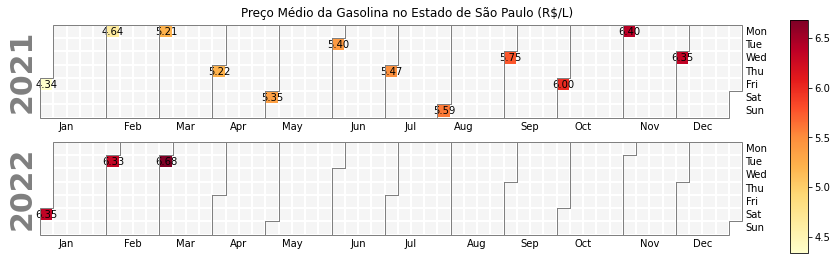

In [8]:
calplot.calplot(sp['PREÇO MÉDIO REVENDA'],textformat='{:.2f}',colorbar=True,cmap ='YlOrRd',suptitle='Preço Médio da Gasolina no Estado de São Paulo (R$/L)')
#plt.savefig('Calendar.png',format ='png', dpi = 300, bbox_inches='tight')